# Topics

## 1. Relaxation Method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pdb import set_trace

In [2]:
'''

From wk6-1
Breakout Solution -- version 1
'''

def solve_eqn(M, b):
    try: 
        Minv = M.I
    except:
        print('Singular Matrix: No inverse.')
        return
    else:
        return np.dot(Minv, b)

In [3]:
M3 = np.matrix([[-3. , -5., 1.], [9. ,14., 1.],  [18., 29., -2.]])

In [4]:
'''How to extract the diagonal part of a matrix'''

D3 = np.diag(M3)
print("The matrix:\n", M3)
print("The diagonal elements:\n", D3)

# Returns True if two arrays are element-wise equal 
# within a tolerance.
# A bit like the Python built-in .any() or .all() methods.
print("The diagonal matrix:\n", np.diagflat(D3))


The matrix:
 [[ -3.  -5.   1.]
 [  9.  14.   1.]
 [ 18.  29.  -2.]]
The diagonal elements:
 [ -3.  14.  -2.]
The diagonal matrix:
 [[ -3.   0.   0.]
 [  0.  14.   0.]
 [  0.   0.  -2.]]


In [5]:
'''
index slicing for matrice: the 0th row
'''
print(M3[0,:])
print(M3[0,])

[[-3. -5.  1.]]
[[-3. -5.  1.]]


In [6]:
'''
index slicing for matrice: the 2nd column
'''
print(M3[:, 2])
# print(M3[, 2])

[[ 1.]
 [ 1.]
 [-2.]]


In [7]:
randmat = np.random.rand(2, 3)
randmat

array([[ 0.41874414,  0.14901074,  0.00474184],
       [ 0.87912722,  0.87112633,  0.35677493]])

In [8]:
M3.shape

(3, 3)

In [9]:
np.random.rand(M3.shape[0], M3.shape[1])

array([[ 0.12381583,  0.75884595,  0.92189665],
       [ 0.92165085,  0.40934285,  0.81972509],
       [ 0.58726281,  0.25901538,  0.27226031]])

## Quiz:
### What's a better way to do 

     np.random.rand(M3.shape[0], M3.shape[1])

In [10]:
np.random.rand(*M3.shape)

array([[ 0.21706633,  0.65307209,  0.12733292],
       [ 0.75650866,  0.80408214,  0.75624453],
       [ 0.32539789,  0.97806243,  0.53717656]])

In [11]:
'''Compare Matrices'''

epsilon = 1e-4*np.random.rand(*M3.shape)

                              
M4 = M3 + epsilon

print("M3:\n", M3)
print("M4:\n", M4)

tol = 1e-3
print("Are M3 and M4 the same within a specified tolerance:", \
      np.allclose(M3, M4, rtol = tol))

M3:
 [[ -3.  -5.   1.]
 [  9.  14.   1.]
 [ 18.  29.  -2.]]
M4:
 [[ -2.9999536   -4.99996169   1.00008104]
 [  9.00009259  14.00004572   1.00005216]
 [ 18.00002471  29.00001856  -1.99997209]]
Are M3 and M4 the same within a specified tolerance: True


## 2. Relaxation Method and the Laplace Equation.


### The name, "Relaxation Method":

### For example, for the diffusion equation, an initial temperature distribution $u(x, t)$ "relaxes" to an equilibrium solution as $t \to \infty$.

(See Numerical Recipes 3rd. Ed. p. 1059)

## Relaxation Methods: The Jacobi Method
### Solving a linear set of equations

## Breakout Exercise -- The Jacobi Method Part I:

### Given


$A = \begin{bmatrix}
 10 & -1 & 2 & 0 \\
 -1 & 11 & -1 & 3 \\
 2 & -1 & 10 & -1 \\
 0 & 3 & -1 & 8 \\
\end{bmatrix}$

## and

$b = \begin{bmatrix}
 6 \\
 25 \\
 -11 \\
 15 \\
\end{bmatrix}$


## Find a way to print:
    System of Linear Equations:
    10.0*x1 + -1.0*x2 + 2.0*x3 + 0.0*x4=6.0
    -1.0*x1 + 11.0*x2 + -1.0*x3 + 3.0*x4=25.0
    2.0*x1 + -1.0*x2 + 10.0*x3 + -1.0*x4=-11.0
    0.0*x1 + 3.0*x2 + -1.0*x3 + 8.0*x4=15.0
    
## _Hint_: Use list comprehension to create a formatted string for the terms for each row, and then use string method to insert the "+" sign.

In [12]:
'''
Differences between np.array and np.matrix:

- certain methods only apply to np.matrix objects
- np.matrix is always a 2D object, with *two* indices -- even for a column matrix;
  but np.array, a 1D array only has one index: see examples below

'''


v_arr = np.array([0, 2, -1, 5])
v_col_mat = np.matrix([0, 2, -1, 5])

print(v_arr.shape)
print(v_col_mat.shape)

print(v_arr.T)
print(v_col_mat.T)

print(v_arr.T == v_arr)


(4,)
(1, 4)
[ 0  2 -1  5]
[[ 0]
 [ 2]
 [-1]
 [ 5]]
[ True  True  True  True]


## Breakout Exercise -- The Jacobi Method Part II:

- ### Use the Jacobi Method to solve this set of linear equation
- ### Specify a tolerance, tol, and a maximum amount of iterations to take, max_iter.
- ### Use simple matrix inversion to verify your answer

In [13]:
def jacobi(A, b, tol=1e-7):
    d = np.diag(A)
    D = np.matrix(np.diagflat(d))
    R = A - D
    x = np.dot(D.I, b)
    x0 = np.dot(D.I, b - np.dot(R, x))
    while (not np.allclose(x0, x, rtol = tol)):
        x = np.dot(D.I, b - np.dot(R, x0))
        x, x0 = x0, x
        
    return x0

In [14]:
def jacobi_i(A, b, tol=1e-7):
    d = np.diag(A)
#     D = np.matrix(np.diagflat(d))
    R = A - D
    x = np.dot(D.I, b)
    x0 = np.dot(D.I, b - np.dot(R, x))
    while (not np.allclose(x0, x, rtol = tol)):
        for i in range(R.shape[0]):
            x[i,] = 1 / d[i] * (b[i, ])

In [15]:
def jacobi_a(A, B, max_iter=100,tol=1e-4):
    x = np.diag(A)
    R = A - np.diagflat(D)
    d = np.dot(D.I, b)
    while (counter<max_iter):
        d=np.dot(D.I,(B-d))

In [16]:
A = np.matrix([[10., -1., 2., 0.], [-1., 11., -1., 3.],  [2., -1., 10., -1.], [0., 3., -1., 8.]])
# b = np.matrix(np.array([6., 25., -11., 15.]))
b = np.matrix([[6.], [25.], [-11.], [15.]])
x = jacobi(A, b)

print(x)
print(np.dot(A, x))

[[ 0.99999999]
 [ 2.00000002]
 [-1.00000001]
 [ 1.00000002]]
[[  5.99999985]
 [ 25.00000028]
 [-11.0000002 ]
 [ 15.00000023]]


In [17]:
for i in range(A.shape[0]):
    row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print(" + ".join(row) + "=" + str(b[i]))

10.0*x1 + -1.0*x2 + 2.0*x3 + 0.0*x4=[[ 6.]]
-1.0*x1 + 11.0*x2 + -1.0*x3 + 3.0*x4=[[ 25.]]
2.0*x1 + -1.0*x2 + 10.0*x3 + -1.0*x4=[[-11.]]
0.0*x1 + 3.0*x2 + -1.0*x3 + 8.0*x4=[[ 15.]]


In [18]:
a = np.matrix([[10, -1, 2, 0], 
           [-1, 11, -1, 3], 
           [2, -1, 10, -1], 
           [0, 3, -1, 8]])
print(a - np.diag(np.diag(a)))

[[ 0 -1  2  0]
 [-1  0 -1  3]
 [ 2 -1  0 -1]
 [ 0  3 -1  0]]


## Relaxation Methods: The Laplace Equation


More at http://en.wikipedia.org/wiki/Relaxation_(iterative_method)

[ 0.          0.09999645  0.19999358  0.2999916   0.39999061  0.49999061
  0.5999915   0.69999313  0.79999525  0.89999763  1.        ]


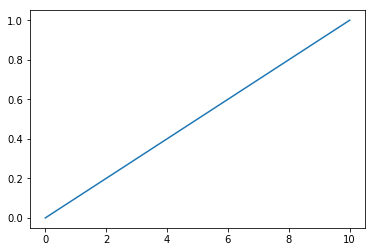

In [19]:
%matplotlib inline
'''Relaxation Method: One dimensional example'''
import numpy as np
import matplotlib.pyplot as plt

NX = 11

#initialization
V = np.zeros(NX)


#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    diff = 0.         #crucial!!
    # start from 1 and end at NX-2: because you don't want to change the BC!!
    for i in range(1, NX-1):    
        newV = (V[i-1]+V[i+1])/2
        prev_diff = abs(newV - V[i])
        # to find the maximum difference in each loop (going over all interior points).
        V[i] = newV
        if diff < prev_diff:    
            diff = prev_diff
  
            
print(V)
plt.plot(x, V)
plt.show()
          

## The Physics:
### This corresponds to the electric potential of a parallel plate capacitor 
### (length, width >> thickness)

In [20]:
%matplotlib inline
'''
Now the subtleties
1. I can remove the if statement
2. I can use random numbers to initialize the interior points.
'''
import sys
import numpy as np
import matplotlib.pyplot as plt

NX = 11

#initialization
# V = np.zeros(NX)

# V = rand(NX)    #yes I can initialize with random numbers!


V = rand(NX)*1e12    # or even crazily large random numbers!


#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2
        diff = abs(newV - V[i])
        V[i] = newV

            
print(V)
plt.plot(x, V)
plt.show()
          

NameError: name 'rand' is not defined

## Breakout Problem:
### For a long rectangular tube (say 10 by 10), the potential on two opposite sides = 1 volt, and the potential on the other two sides = 0.  
### Write a program to find V(x, y) in the interior of the tube. 
### Then plot the result as a surface plot.

## We will see the connection between PDE and linear algebra next week.

## End of week 6-2